In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import datetime


In [4]:
def getpolarity(df):
    polarity = []
    for index in df:
        if index =='POSITIVE':
            polarity.append(1)
        elif index == 'NEGATIVE':
            polarity.append(-1)
        else:
            polarity.append(0)
    return polarity

def reformatdate(df):
    newformat = []
    for index in df:
        newformat.append(pd.to_datetime(index).strftime('%d')) #%d-%m-%y
    return newformat

Actual Sentimet vs Prediction

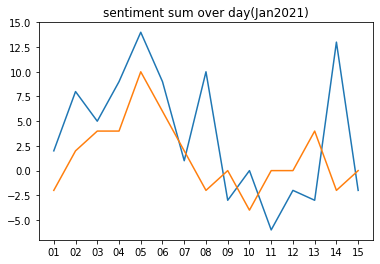

In [43]:
#get every day avarage sentiment
df = pd.read_csv('../../Data/Training/news_val_2021Jan_noN.csv')
df['polarity'] = getpolarity(df['Sentiment'])
df['actual'] = getpolarity(df['combine_sentiment_N'])
df['Published_date'] = reformatdate(df['Published_date'])

plt.title("sentiment sum over day(Jan2021)")
polarity = df.groupby(['Published_date']).sum()['polarity']
actual = df.groupby(['Published_date']).sum()['actual']
# print(polarity)
plt.plot(polarity.index, polarity, actual*2)


Bitcoin vs sentiment

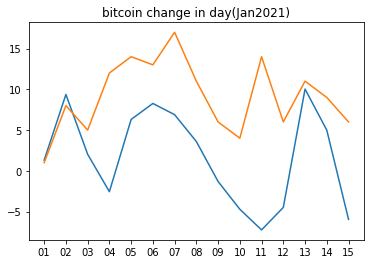

In [31]:
df1 = pd.read_csv('../../Data/Bitcoin/Bitcoin2021_Jan.csv')
df1['Date'] = reformatdate(df1['Date'])
polarity = getpolarity(df['Sentiment'])

polarity = df.groupby(['Published_date']).sum()['polarity'] #or sum()

plt.title("bitcoin change in day(Jan2021)")
x = df1['Date']
y = df1['change (%)']
z = polarity


plt.plot(x,y, z)

vader_day vs actual

0    -1
1     1
2     1
3     1
4     1
5     1
6    -1
7    -1
8     1
9     1
10    1
11    1
12    1
13    1
14    1
Name: polarity, dtype: int64


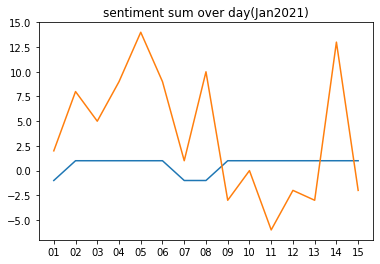

In [22]:
df = pd.read_csv('../../Data/Training/news_val_2021Jan_noN.csv')
df2 = pd.read_csv('../../Data/Sentiment/vader_by_day.csv')
#get every day avarage sentiment
df2['polarity'] = getpolarity(df2['sentiment_vader'])
df['actual'] = getpolarity(df['Sentiment'])
df['Published_date'] = reformatdate(df['Published_date'])

plt.title("sentiment sum over day(Jan2021)")
polarity = df2['polarity'] 
actual = df.groupby(['Published_date']).sum()['actual']
print(polarity)
plt.plot(polarity.index, polarity, actual)
